In [1]:
# 使用隔离森林算法识别属性表现异常的国家
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from mpl_toolkits.mplot3d import Axes3D
covidtotals = pd.read_csv('C:\dataClean\Python-Data-Cleaning-Cookbook\Chapter04\data\covidtotals.csv')
covidtotals.set_index('iso_code',inplace=True)

In [2]:
analysisvars = ['location', 'total_cases_pm', 'total_deaths_pm', 'pop_density', 'median_age', 'gdp_per_capita']
standardizer = StandardScaler()
covidtotals.isnull().sum()

lastdate            0
location            0
total_cases         0
total_deaths        0
total_cases_pm      0
total_deaths_pm     0
population          0
pop_density        12
median_age         24
gdp_per_capita     28
hosp_beds          46
dtype: int64

In [4]:
covidanalysis = covidtotals.loc[:, analysisvars].dropna()
covidanalysisstand = standardizer.fit_transform(covidanalysis.iloc[:, 1:])

In [8]:
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=.1, max_features=1.0)
clf.fit(covidanalysisstand)
covidanalysis['anomaly'] = clf.predict(covidanalysisstand)           # 新建一列离群值
covidanalysis['scores'] = clf.decision_function(covidanalysisstand)
covidanalysis.anomaly.value_counts()

 1    157
-1     18
Name: anomaly, dtype: int64

In [9]:
inlier, outlier = covidanalysis.loc[covidanalysis.anomaly==1], covidanalysis.loc[covidanalysis.anomaly==-1]
outlier[['location', 'total_cases_pm', 'total_deaths_pm', 'median_age', 'gdp_per_capita', 'scores']].sort_values(['scores']).head(10)

,location,total_cases_pm,total_deaths_pm,median_age,gdp_per_capita,scores
iso_code,,,,,,
QAT,Qatar,19753.146,13.190,31.9,116935.600,-0.235593
SGP,Singapore,5962.727,3.931,42.4,85535.383,-0.195800
HKG,Hong Kong,0.000,0.000,44.8,56054.920,-0.168013
BEL,Belgium,5037.354,816.852,41.8,42658.576,-0.149446
LUX,Luxembourg,6418.776,175.726,39.7,94277.965,-0.108342
BHR,Bahrain,6698.468,11.166,32.4,43290.705,-0.095049
ITA,Italy,3853.985,552.663,47.9,35220.084,-0.087759
ESP,Spain,5120.952,580.197,45.5,34272.360,-0.086185
IRL,Ireland,5060.962,334.562,38.7,67335.293,-0.048413


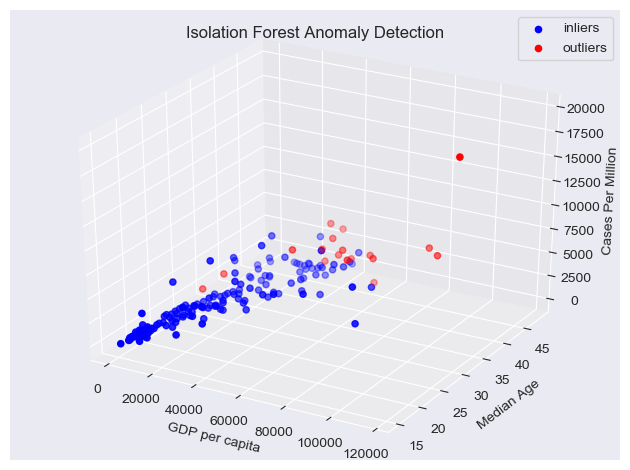

In [10]:
ax = plt.axes(projection='3d')
ax.set_title('Isolation Forest Anomaly Detection')
ax.set_zlabel('Cases Per Million')
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Median Age')
ax.scatter3D(inlier.gdp_per_capita, inlier.median_age, inlier.total_cases_pm, label='inliers', c='blue')
ax.scatter3D(outlier.gdp_per_capita, outlier.median_age, outlier.total_cases_pm, label='outliers', c='red')
ax.legend()
plt.tight_layout()
plt.show()